## 1. Meet Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_49/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_49/datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about <em>childbed fever</em>: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and <em>wash their hands</em>!</p>
<p>In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of <em>handwashing</em>. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.</p>

In [61]:
# Load in the tidyverse package
# .... YOUR CODE FOR TASK 1 ....
library(tidyverse)
# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly <- read_csv("datasets/yearly_deaths_by_clinic.csv")

# Print out yearly
head(yearly, n = 10)

Parsed with column specification:
cols(
  year = col_double(),
  births = col_double(),
  deaths = col_double(),
  clinic = col_character()
)


year,births,deaths,clinic
<dbl>,<dbl>,<dbl>,<chr>
1841,3036,237,clinic 1
1842,3287,518,clinic 1
1843,3060,274,clinic 1
1844,3157,260,clinic 1
1845,3492,241,clinic 1
1846,4010,459,clinic 1
1841,2442,86,clinic 2
1842,2659,202,clinic 2
1843,2739,164,clinic 2


In [62]:
library(testthat) 
library(IRkernel.testthat)
run_tests({
    test_that("Read in data correctly.", {
        expect_is(yearly, "tbl_df", 
            info = 'You should use read_csv (with an underscore) to read "datasets/yearly_deaths_by_clinic.csv" into yearly.')
    })
    
    test_that("Read in data correctly.", {
        yearly_temp <- read_csv('datasets/yearly_deaths_by_clinic.csv')
        expect_equivalent(yearly, yearly_temp, 
            info = 'yearly should contain the data in "datasets/yearly_deaths_by_clinic.csv"')
    })
})

2/2 tests passed

## 2. The alarming number of deaths
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>
<p>We see this more clearly if we look at the <em>proportion of deaths</em> out of the number of women giving birth. </p>

In [63]:
# Adding a new column to yearly with proportion of deaths per no. births
# .... YOUR CODE FOR TASK 1 ....
yearly <- yearly %>%
    mutate(proportion_deaths = deaths / births)
# Print out yearly
yearly

year,births,deaths,clinic,proportion_deaths
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1841,3036,237,clinic 1,0.07806324
1842,3287,518,clinic 1,0.15759051
1843,3060,274,clinic 1,0.08954248
1844,3157,260,clinic 1,0.08235667
1845,3492,241,clinic 1,0.06901489
1846,4010,459,clinic 1,0.11446384
1841,2442,86,clinic 2,0.03521704
1842,2659,202,clinic 2,0.07596841
1843,2739,164,clinic 2,0.05987587


In [64]:
run_tests({
    test_that("A proportion_deaths column exists", {
        expect_true("proportion_deaths" %in% names(yearly), 
            info = 'yearly should have the new column proportion_deaths')
    })
    
    test_that("Read in data correctly.", {
        yearly_temp <- read_csv('datasets/yearly_deaths_by_clinic.csv') %>% 
          mutate(proportion_deaths = deaths / births)
        expect_equivalent(yearly, yearly_temp, 
            info = 'proportion_deaths should be calculated as deaths / births')
    })
})

2/2 tests passed

## 3. Death at the clinics
<p>If we now plot the proportion of deaths at both clinic 1 and clinic 2  we'll see a curious pattern…</p>

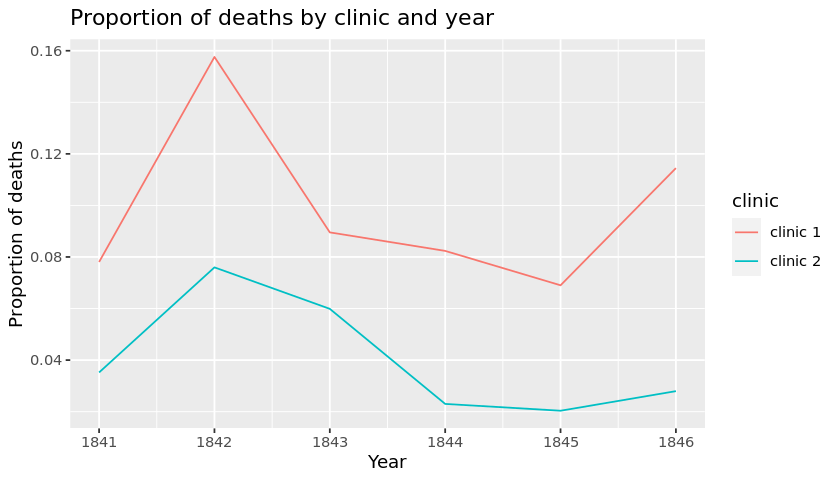

In [65]:
# Setting the size of plots in this notebook
options(repr.plot.width=7, repr.plot.height=4)

# Plot yearly proportion of deaths at the two clinics
# .... YOUR CODE FOR TASK 3 ....
ggplot(data = yearly, aes(x = year, y = proportion_deaths, group = clinic, color = clinic)) + 
geom_line() +
labs(x = 'Year', y = 'Proportion of deaths',
    title = 'Proportion of deaths by clinic and year')

In [66]:
run_tests({
    test_that("The right columns are plotted", {
        mappings <- str_replace(as.character(last_plot()$mapping), "~", "")
        expect_true(all(c("year", "proportion_deaths", "clinic") %in% mappings),
                    info = "year should be on the x-axis, proportion_deaths should be on the y-axis, and clinic should be mapped to color.")
    })
})


1/1 tests passed

## 4. The handwashing begins
<p>Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>
<p>Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

In [67]:
# Read datasets/monthly_deaths.csv into monthly
monthly <- read_csv("datasets/monthly_deaths.csv")

# Adding a new column with proportion of deaths per no. births
# .... YOUR CODE FOR TASK 4 ....
monthly <- monthly %>%
    mutate(proportion_deaths = deaths / births)
# Print out the first rows in monthly
# .... YOUR CODE FOR TASK 4 ....
head(monthly, n = 10)

Parsed with column specification:
cols(
  date = col_date(format = ""),
  births = col_double(),
  deaths = col_double()
)


date,births,deaths,proportion_deaths
<date>,<dbl>,<dbl>,<dbl>
1841-01-01,254,37,0.145669291
1841-02-01,239,18,0.075313808
1841-03-01,277,12,0.043321300
1841-04-01,255,4,0.015686275
1841-05-01,255,2,0.007843137
1841-06-01,200,10,0.050000000
1841-07-01,190,16,0.084210526
1841-08-01,222,3,0.013513514
1841-09-01,213,4,0.018779343


In [68]:
run_tests({
    
   test_that("Read in data correctly.", {
        expect_is(monthly, "tbl_df", 
            info = 'You should use read_csv (with an underscore) to read "datasets/monthly_deaths.csv" into monthly.')
    })
    
    test_that("Read in monthly correctly.", {
        monthly_temp <- read_csv("datasets/monthly_deaths.csv")
        expect_true(all(names(monthly_temp) %in% names(monthly)), 
            info = 'monthly should contain the data in "datasets/monthly_deaths.csv"')
    })
    
    test_that("proportion_death is calculated correctly.", {
        monthly_temp <- read_csv("datasets/monthly_deaths.csv")
        monthly_temp <- monthly_temp %>% 
          mutate(proportion_deaths = deaths / births)
        expect_equivalent(monthly, monthly_temp, 
            info = 'proportion_deaths should be calculated as deaths / births')
    })
})

3/3 tests passed

## 5. The effect of handwashing
<p>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!</p>

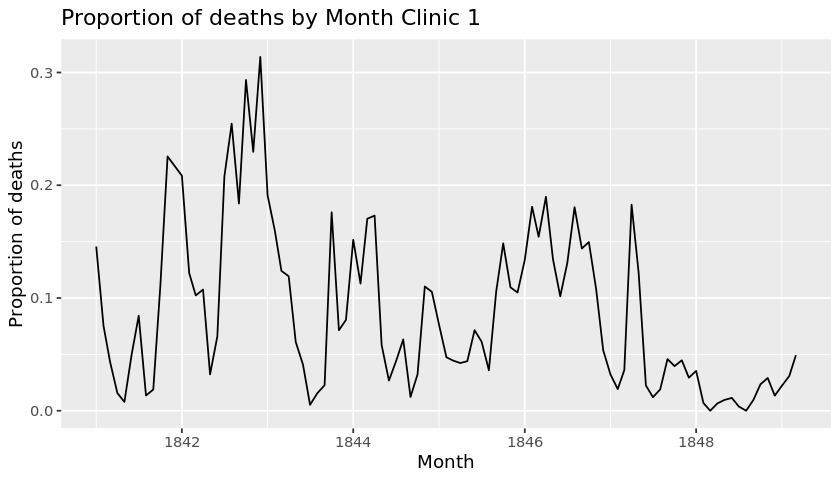

In [69]:
# Plot monthly proportion of deaths
# ... YOUR CODE FOR TASK 5 ...
ggplot(data = monthly, aes(x = date, y = proportion_deaths)) +
    geom_line() +
    labs(x = "Month", y = "Proportion of deaths",
        title = "Proportion of deaths by Month Clinic 1")

In [70]:
run_tests({
    test_that("The right columns are plotted", {        
        mappings <- str_replace(as.character(last_plot()$mapping), "~", "")
        expect_true(all(c("date", "proportion_deaths") %in% mappings), 
            info = "date should be on the x-axis, proportion_deaths on the y-axis")
    })
})

1/1 tests passed

## 6. The effect of handwashing highlighted
<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. </p>
<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

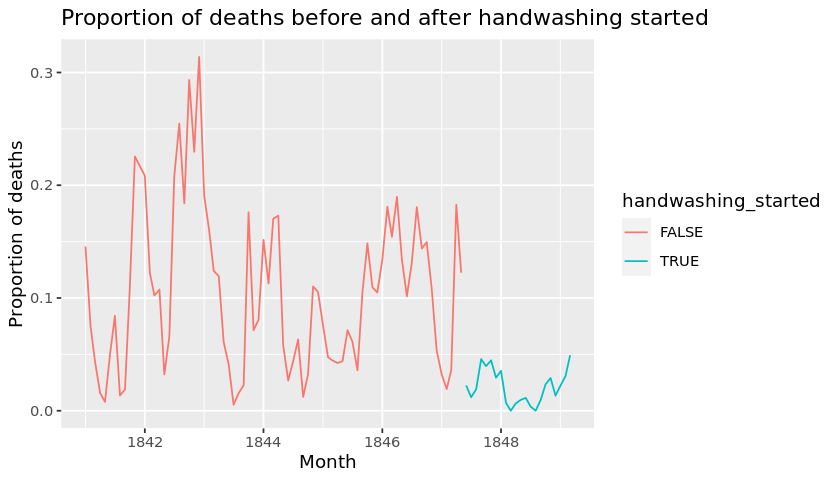

In [71]:
# From this date handwashing was made mandatory
handwashing_start = as.Date('1847-06-01')

# Add a TRUE/FALSE column to monthly called handwashing_started
# .... YOUR CODE FOR TASK 6 ....
monthly <- monthly %>%
    mutate(handwashing_started = date >= handwashing_start)
# Plot monthly proportion of deaths before and after handwashing
# .... YOUR CODE FOR TASK 6 ....
ggplot(data = monthly, aes(x = date, y = proportion_deaths, color = handwashing_started)) +
    geom_line() +
    labs(x = "Month", y = "Proportion of deaths",
        title = "Proportion of deaths before and after handwashing started")

In [72]:
run_tests({
    test_that("handwashing_started has been defined", {
        expect_true("handwashing_started" %in% names(monthly),
            info = 'monthly should contain the column handwashing_started.')
    })  
    
    test_that("there are 22 rows where handwashing_started is TRUE", {
        expect_equal(22, sum(monthly$handwashing_started),
            info = 'handwashing_started should be a TRUE/FALSE column where the rows where handwashing was enforced are set to TRUE.')
    })
    
    test_that("The right columns are plotted", {        
        mappings <- str_replace(as.character(last_plot()$mapping), "~", "")
        expect_true(all(c("date", "proportion_deaths", "handwashing_started") %in% mappings), 
            info = 'date should be on the x-axis, proportion_deaths on the y-axis, and handwashing_started should be mapped to color.')
    })
})

3/3 tests passed

## 7. More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [73]:
# Calculating the mean proportion of deaths 
# before and after handwashing.

monthly_summary <- monthly %>%
    group_by(handwashing_started)%>%
    summarise(mean_proportion_deaths = mean(proportion_deaths))
# .... YOUR CODE FOR TASK 7 HERE ....

# Printing out the summary.
monthly_summary

`summarise()` ungrouping output (override with `.groups` argument)


handwashing_started,mean_proportion_deaths
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338


In [74]:
run_tests({
    test_that("mean_proportion_deaths was calculated correctly", {
        flat_summary <- as.numeric(unlist(monthly_summary))
        handwashing_start = as.Date('1847-06-01')
        monthly_temp <- read_csv("datasets/monthly_deaths.csv") %>% 
          mutate(proportion_deaths = deaths / births) %>% 
          mutate(handwashing_started = date >= handwashing_start) %>% 
          group_by(handwashing_started) %>%
          summarise(mean_proportion_deaths = mean(proportion_deaths))
        expect_true(all(monthly_temp$mean_proportion_deaths %in% flat_summary),
            info = 'monthly_summary should contain the mean monthly proportion of deaths before and after handwashing was enforced.')
    })  
})

1/1 tests passed

## 8. A statistical analysis of Semmelweis handwashing data
<p>It reduced the proportion of deaths by around 8 percentage points! From 10% on average before handwashing to just 2% when handwashing was enforced (which is still a high number by modern standards). 
To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using a t-test).</p>

In [75]:
# Calculating a 95% Confidence intrerval using t.test
group1 <- monthly$proportion_deaths[monthly$handwashing_started == TRUE]
group2 <- monthly$proportion_deaths[monthly$handwashing_started == FALSE]

test_result <- t.test(group2, group1, conf.level = 0.95)
test_result


	Welch Two Sample t-test

data:  group2 and group1
t = 9.6101, df = 92.435, p-value = 1.445e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.06660662 0.10130659
sample estimates:
 mean of x  mean of y 
0.10504998 0.02109338 


In [76]:
run_tests({
    test_that("the confidence intervals match", {
        temp_test_result <- t.test( proportion_deaths ~ handwashing_started, data = monthly)
        expect_equivalent(test_result$conf.int, temp_test_result$conf.int,
            info = 'The t-test should be calculated with proportion_deaths as a function of handwashing_started.')
    })  
})

1/1 tests passed

## 9. The fate of Dr. Semmelweis
<p>That the doctors didn't wash their hands increased the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>
<p>The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as <em>bacteria</em>) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.</p>
<p>One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.</p>

In [77]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands <- TRUE

In [78]:
run_tests({
    test_that("The project is finished.", {
        expect_true(doctors_should_wash_their_hands, 
            info = "Semmelweis would argue that doctors_should_wash_their_hands should be TRUE .")
    })  
})

1/1 tests passed